## LEAD SCORING CASE STUDY

### PROBLEM STATEMENT 
- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses and has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.


### IMPORTING LIBRARIES

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### READING AND CLEANING DATAFRAME 

In [138]:
#loading dataframe
lead_edu = pd.read_csv("/Users/mnarasap/Downloads/Lead Scoring Assignment/Leads.csv")
lead_edu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [139]:
#INSPECTING the dataframe
#checking dataframe shape : dataframe has 9240 rows and 37 columns

lead_edu.shape

(9240, 37)

In [140]:
lead_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [141]:
lead_edu.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [142]:
lead_edu.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [143]:
lead_edu.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [144]:
# checking if any duplicates : no duplicates found 


lead_edu.loc[lead_edu.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [145]:
#checking missing values
lead_edu.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [146]:
# Finding percentage of missing values

def get_percentage_of_missing(lead_edu):
    num=lead_edu.isnull().sum()
    den=len(lead_edu)
    return round(num/den,2)

In [147]:
get_percentage_of_missing(lead_edu)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [148]:
#reconfirming percentage of null values
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [149]:
# We will drop those columns having null percentage value more than 40%
# I am not removing Lead Quality column which has high percentage of null values, lets separately check this column once.
lead_edu = lead_edu.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
lead_edu.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Ringing,NaN,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [150]:
# checking lead quality column , missed dropping it which contains 51% of null values
lead_edu['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [151]:
# dropping the lead quality column too
lead_edu = lead_edu.drop(['Lead Quality'],axis=1)
lead_edu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [152]:
# checking some categorical columns which has 'select' as the entry, that should be considered and needs to be replaced with some np.nan

lead_edu['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [153]:
lead_edu['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [154]:
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [155]:
# The high percentage null values were removed but now we have to check the other less percentage values 
# columns like Tags, Lead Profile, What matters most to you in choosing a course, What is your current occupation
# How did you hear about X Education, Country, Specialization, City have 25% to 36% null values
# columns likes, TotalVisits, Page Views Per Visit, Last Activity and Lead Source have 0.30 to 1.5% null values

# Lets check what best can be done to treat these missing values


In [156]:
# this below loop will help me to get the category based columns 
for column in lead_edu:
    print(lead_edu[column].astype('category').value_counts())
    print('------------------next column values------------------------')
        

    

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
------------------next column values------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
------------------next column values------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


In [157]:
# Columns like 'specialization', 'How did you hear about X Education', 'Lead Profile', 'City' has 'select' as values 
# Need to convert these values to Nan values and then recompute missing values 

In [158]:
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [159]:
# to check which columns have 'select' values and replace them to np.nan, so that these can be converted to null values

lead_edu.replace('Select',np.nan)
lead_edu.replace('select',np.nan)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,wrong number given,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,invalid number,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,NaN,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [160]:
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [161]:
# Columns like 'specialization', 'How did you hear about X Education', 'Lead Profile', 'City' has 'select' values 
lead_edu['Lead Profile'].value_counts()


Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [162]:
#converting 'select' values in Lead Profile to NaN
lead_edu['Lead Profile'] = lead_edu['Lead Profile'].replace('Select',np.nan)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,Interested in other courses,No,No,NaN,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,Ringing,No,No,NaN,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,wrong number given,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,invalid number,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,NaN,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [163]:
#converting 'select' values in Specialization to NaN
lead_edu['Specialization'] = lead_edu['Specialization'].replace('Select',np.nan)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,Interested in other courses,No,No,NaN,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,Ringing,No,No,NaN,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,wrong number given,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,invalid number,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,NaN,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [164]:
# converting 'select' values in 'How did you hear about X Education' to NaN
lead_edu['How did you hear about X Education'] = lead_edu['How did you hear about X Education'].replace('Select',np.nan)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,Interested in other courses,No,No,NaN,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,Ringing,No,No,NaN,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,wrong number given,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,invalid number,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,NaN,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [165]:
# converting 'select' values in 'City' to NaN
lead_edu['City'] = lead_edu['City'].replace('Select',np.nan)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,wrong number given,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,invalid number,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,NaN,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [166]:
# getting NaN count
lead_edu.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [167]:
#checking for the null percentage again 
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [168]:
# after confirming found 'Lead Profile' and 'How did you hear about X Education' with high null(NA) percentage
# going to drop these two columns from dataframe 
round(100*(lead_edu.isna().sum()/len(lead_edu.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [169]:
# Dropping the below two columns
lead_edu=lead_edu.drop(['Lead Profile','How did you hear about X Education'],axis=1)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,NaN,No,No,Other Metro Cities,No,No,SMS Sent


In [170]:
#checking for the null percentage again 
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Lets decide what best can be done for below columns which contains < 40 null percentage, whether to impute or drop
- Country                                          26.63
- Specialization                                   36.58
- What is your current occupation                  29.11
- What matters most to you in choosing a course    29.32
- Tags                                             36.29
- City                                             39.71

In [171]:
# Let's first check for Country column
lead_edu.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Germany                    4
Nigeria                    4
Canada                     4
Sweden                     3
Belgium                    2
Netherlands                2
Bangladesh                 2
Asia/Pacific Region        2
China                      2
Philippines                2
Ghana                      2
Italy                      2
Uganda                     2
Kenya                      1
Vietnam                    1
Sri Lanka                  1
Malaysia                   1
Russia                     1
Switzerland                1
Liberia       

In [172]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(lead_edu[lead_edu['Country'] == 'India'])/len(lead_edu['Country']),2)
print(country_percentage)

70.26


In [173]:
# Ohh!! It is 70% of the times India has occured in the values and which has 27% approx null values, so lets drop this
lead_edu=lead_edu.drop(['Country'],axis=1)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,NaN,No,No,Other Metro Cities,No,No,SMS Sent


In [174]:
lead_edu.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [175]:
# We can observe that most of the values are Mumbai and the next highest is again Maharashtra very few are other cities
# So i think we can percentage value of Mumbai

city_percentage = round(100*len(lead_edu[lead_edu['City'] == 'Mumbai'])/len(lead_edu['City']),2)
print(city_percentage)


34.87


In [176]:
# Now if we consider this city column 35% it has vamues as Mumbai and null percentage is amost 40%, rest 30 is again divided into smaller value parts, so this looks very skewed , better to drop this column
# Dropping City column

lead_edu=lead_edu.drop(['City'],axis=1)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,wrong number given,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,invalid number,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,NaN,No,No,No,No,SMS Sent


In [177]:
lead_edu.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [178]:
# In tags column approx 23% values 'will revert after reading email' and this contains 36% of null values
# which can definitely be removed

tags_percentage = round(100*len(lead_edu[lead_edu['Tags'] == 'Will revert after reading the email'])/len(lead_edu['Tags']),2)
print(tags_percentage)

22.42


In [179]:
lead_edu=lead_edu.drop(['Tags'],axis=1)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,No,No,No,SMS Sent


In [180]:
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [181]:
# checking 'What is your current occupation' column and what best can be imputed for nan values

lead_edu['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [182]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that as value for the null columns

lead_edu['What is your current occupation'] = lead_edu['What is your current occupation'].replace(np.nan, 'No Information')

lead_edu['What is your current occupation'].value_counts()

Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [183]:
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [184]:
# checking 'What matters most to you in choosing a course' column

lead_edu['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [185]:
# As we can clearly see here 'Better career prospects' contains the most value, lets see its percentage
matters_percentage=round(100*len(lead_edu[lead_edu['What matters most to you in choosing a course']== 'Better Career Prospects'])/len(lead_edu['What matters most to you in choosing a course']),2)

print(matters_percentage)


70.65


In [186]:
# Better career prospects contains 71% of values approx and this column contains 29% of missing values too, lets drop it

lead_edu=lead_edu.drop(['What matters most to you in choosing a course'], axis=1)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,No,No,No,No,No,No,SMS Sent


In [187]:
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                              36.58
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [188]:
# Specialiazation needs to be checked , below values seem to be more of managemnet category , we can group them in one
lead_edu.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [189]:
lead_edu['Specialization'].head()

0                        NaN
1                        NaN
2    Business Administration
3      Media and Advertising
4                        NaN
Name: Specialization, dtype: object

In [190]:
# Filled Nan values to 'Not provided'
lead_edu['Specialization'] = lead_edu['Specialization'].fillna('Not provided')
lead_edu['Specialization'].head()

0               Not provided
1               Not provided
2    Business Administration
3      Media and Advertising
4               Not provided
Name: Specialization, dtype: object

In [191]:
lead_edu['Specialization'].head(20)

0                  Not provided
1                  Not provided
2       Business Administration
3         Media and Advertising
4                  Not provided
5                  Not provided
6       Supply Chain Management
7                  Not provided
8        IT Projects Management
9            Finance Management
10           Travel and Tourism
11    Human Resource Management
12         Marketing Management
13      Business Administration
14      Business Administration
15                 Not provided
16                 Not provided
17                 Not provided
18         Marketing Management
19                 Not provided
Name: Specialization, dtype: object

In [192]:
lead_edu.Specialization.value_counts()

Not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [193]:
# converting '* Management' values in 'Specialization' to Management 
lead_edu['Specialization'] = lead_edu['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management')
lead_edu.Specialization.value_counts()

Management                           4253
Not provided                         3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [194]:
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [195]:
# Now its time to check other 1% of missing value containing columns like Last activity, Page views per visit, TotalVisits, Lead Source


lead_edu['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [196]:
lead_edu['Last Activity'] = lead_edu['Last Activity'].replace(np.nan, 'Not Sure')
lead_edu['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Not Sure                         103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [197]:
# checking Page views per visit

lead_edu['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [198]:
# lets check the median value so that this can be assigned to nan values 
lead_edu['Page Views Per Visit'].median()

2.0

In [199]:
lead_edu['Page Views Per Visit'] = lead_edu['Page Views Per Visit'].replace(np.nan, lead_edu['Page Views Per Visit'].median())
lead_edu['Page Views Per Visit'].head()

0    0.0
1    2.5
2    2.0
3    1.0
4    1.0
Name: Page Views Per Visit, dtype: float64

In [200]:
# checking TotalVisits

lead_edu['TotalVisits'].value_counts()


0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [201]:
lead_edu['TotalVisits'].median()

3.0

In [202]:
# Lets assign the median values to all nan values
lead_edu['TotalVisits'] = lead_edu['TotalVisits'].replace(np.nan, lead_edu['TotalVisits'].median())

In [203]:
lead_edu['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [204]:
# Check the value counts for the column Lead Source

lead_edu['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
testone                 1
welearnblog_Home        1
blog                    1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [205]:
# Here we can see that Google is with major count and another with 'google', can also be considered together
# we can impute the null values with Google

lead_edu['Lead Source'] = lead_edu['Lead Source'].replace('google', 'Google')
lead_edu['Lead Source'] = lead_edu['Lead Source'].replace(np.nan, 'Google')

In [206]:
round(100*(lead_edu.isnull().sum()/len(lead_edu.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [207]:
# No more null values in the dataframe, lets check the columns which are of Yes/No categories and how best we can treat those

# Above in the middle we had checked all the categorical columns with their value counts, considering that moving forward below.

# Since the following 5 columns have only "No" value in all the rows, we can drop these columns no analysis can be done with below columns

# 1. Magazine 2. Receive More Updates About Our Courses 3. Update me on Supply Chain Content 
# 4. I agree to pay the amount through cheque 5. Get updates on DM Content


lead_edu['Receive More Updates About Our Courses'].value_counts()


No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [208]:
lead_edu['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [209]:
lead_edu['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [210]:
lead_edu['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [211]:
lead_edu['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [212]:
lead_edu = lead_edu.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,Not provided,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,Not provided,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,Not provided,Unemployed,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,Management,Unemployed,No,No,No,No,No,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,Media and Advertising,Unemployed,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,Business Administration,Unemployed,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,Management,No Information,No,No,No,No,No,No,No,SMS Sent


#### OUTLIER TREATMENT 
- Checking numerical columns and finding outliers 

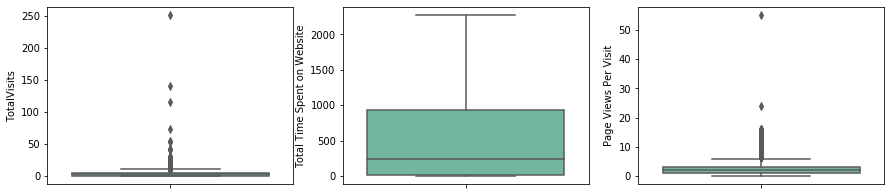

In [213]:
# Lead Number, TotalVisits, Total Time Spent on Website, Page Views Per Visit are numerical columns
# Converted is in 0 and 1 and a target variable , so it should be considered as a category


# Lets check outliers using boxplot for below numerical columns

plt.figure(figsize=(15, 15))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = lead_edu)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = lead_edu)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = lead_edu)
plt.show()



# We can see the outliers at upper end for 'TotalVisits' and 'Page Views Per Visit'

In [214]:
# Capping for the numerical columns 
# 1. For TotalVisits : capping the higher end value at 0.99 and lower at 0.01, because we need higher values for analysis.

q1=lead_edu['TotalVisits'].quantile(0.01)
q4=lead_edu['TotalVisits'].quantile(0.99)

lead_edu['TotalVisits'][lead_edu['TotalVisits'] <=q1]=q1
lead_edu['TotalVisits'][lead_edu['TotalVisits'] >=q4]=q4



In [215]:
# 2. For Page Views Per Visit
q1=lead_edu['Page Views Per Visit'].quantile(0.01)
q4=lead_edu['Page Views Per Visit'].quantile(0.99)

lead_edu['Page Views Per Visit'][lead_edu['Page Views Per Visit'] <=q1]=q1
lead_edu['Page Views Per Visit'][lead_edu['Page Views Per Visit'] >=q4]=q4

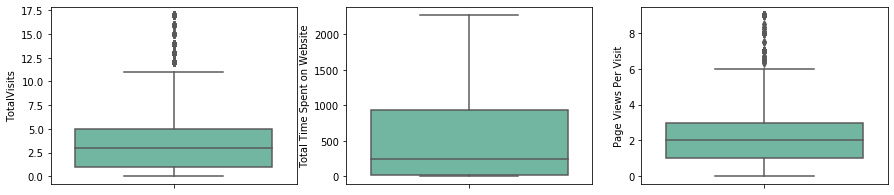

In [216]:
# rechecking outliers by plotting box plot
plt.figure(figsize=(15, 15))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = lead_edu)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = lead_edu)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = lead_edu)
plt.show()


In [218]:
lead_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [225]:
lead_edu.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Not provided,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Not provided,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Not provided,Unemployed,No,No,No,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,Not provided,No Information,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,Management,Unemployed,No,No,No,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,Not provided,No Information,No,No,No,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,Management,No Information,No,No,No,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,Management,No Information,No,No,No,No,No,No,No,Email Opened


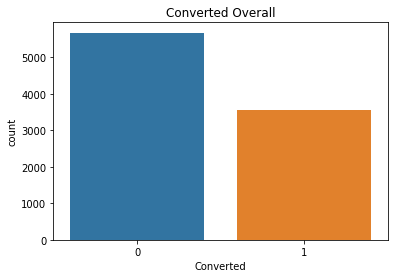

In [258]:
# checking on converted variable, will analyse it later , before we will first concentrate on other categorical columns
sns.countplot(lead_edu['Converted'])
plt.title('Converted Overall')
plt.show()

# 0 means no conversion, 1 means there was a conversion

In [231]:
# checking the other non skewed categorical columns and to have proper categories done for the columns
# Columns like Last Activity, Lead Source, Lead Origin, What is your current occupation, Specialization, last notable activity needs to be checked
# The columns other than 'yes/No' 

# 1. checking on Last Activity

lead_edu['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Not Sure                         103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [232]:
# we can combine the lesser percentage values categories to one category and categories it as 'other'

lead_edu['Last Activity']=lead_edu['Last Activity'].replace(['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Other')
lead_edu['Last Activity'].value_counts()


Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Not Sure                      103
Unreachable                    93
Unsubscribed                   61
Other                          51
Name: Last Activity, dtype: int64

In [233]:
# 2. Checking Last Notable Activity and converting lower percentage values to other
lead_edu['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [234]:
# converting lower percentage values to other category
lead_edu['Last Notable Activity']=lead_edu['Last Notable Activity'].replace(['Had a Phone Conversation','Email Bounced','Unsubscribed','Unreachable','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Form Submitted on Website'],'Other')
lead_edu['Last Notable Activity'].value_counts()


Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

In [227]:
# 3. Checking Lead Source and converting lower percentage values to other
lead_edu['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
testone                 1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [235]:
#converting lower percentage values to other
lead_edu['Lead Source']=lead_edu['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','WeLearn','NC_EDM','welearnblog_Home','youtubechannel','testone','blog','Pay per Click Ads'],'Other') 
lead_edu['Lead Source'].value_counts()


Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other                 23
Name: Lead Source, dtype: int64

In [228]:
# 4. Checking 'Lead Origin' and converting lower percentage values to other
lead_edu['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

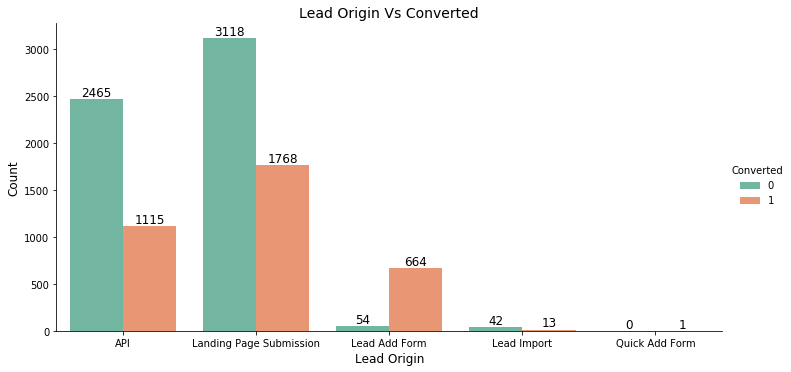

In [237]:
# checking with catplot which can help in knowing how many lower values people had conversions

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_edu, palette="Set2", 
                   aspect = 2.0);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# so by below graph we can see that Quick add form category person was a converted one, so lets keep all categories of this column



In [229]:
# 5. checking 'What is your current occupation' and converting lower percentage values to other
lead_edu['What is your current occupation'].value_counts()

Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [238]:
lead_edu['What is your current occupation']=lead_edu['What is your current occupation'].replace(['Housewife','Businessman'],'Other')
lead_edu['What is your current occupation'].value_counts()

Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [239]:
# 6. checking 'Specialization' column and converting lower percentage values to other
lead_edu['Specialization'].value_counts()

Management                           4253
Not provided                         3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [242]:
lead_edu['Specialization']=lead_edu['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'],'Other')
lead_edu['Specialization'].value_counts()


Management                           4253
Not provided                         3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Other                                 170
E-COMMERCE                            112
Name: Specialization, dtype: int64

In [256]:
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,Not provided,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,Not provided,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,Not provided,Unemployed,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,Management,Unemployed,No,No,No,No,No,No,No,Other
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,Media and Advertising,Unemployed,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,Business Administration,Unemployed,No,No,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,Management,No Information,No,No,No,No,No,No,No,SMS Sent


In [249]:
# Further Below are the Yes/NO categorical columns

lead_edu['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [250]:
lead_edu['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [248]:
lead_edu['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [224]:
lead_edu['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [251]:
lead_edu['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [252]:
lead_edu['X Education Forums'].value_counts() # I think we should drop this column, lets catch it later

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [253]:
lead_edu['Newspaper'].value_counts() # I think we should drop this column, lets catch it later

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [254]:
lead_edu['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [255]:
lead_edu['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

### DATA ANALYSIS

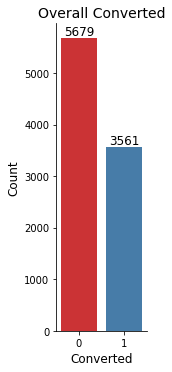

In [269]:
# We will analyse on the categorical variables in the dataframe with the Converted variable(which is the target variable)

# Lets check how many were converted overall.

plot = sns.catplot(x="Converted", kind="count", data=lead_edu, palette="Set1", aspect= 0.4);

plt.title('Overall Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()


# Below Shows overall conversion count is 3561 out of 9240


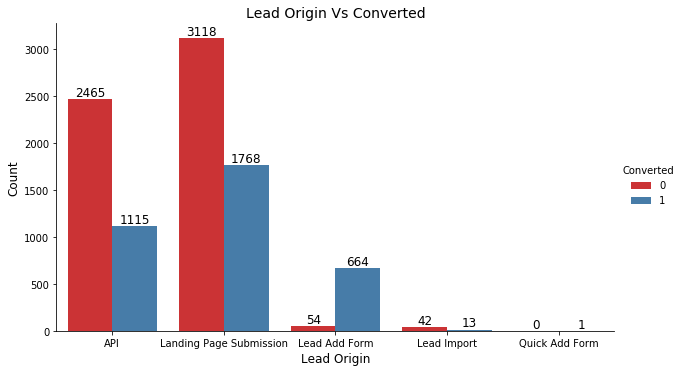

In [270]:
# Lead Origin vs Converted

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()


# From below graph we can make out with 'Landing Page Submission' maximum conversions happened.
# Also as analysed earlier, only one Origin was from 'Quick Add Form' and that person got converted. Such an important thing to note.




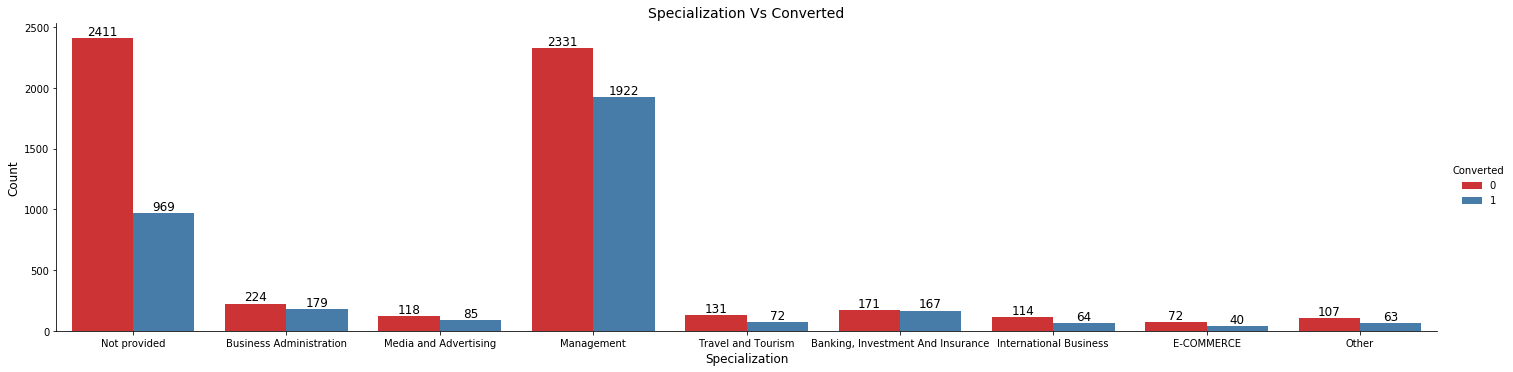

In [271]:
# plotting a cat plot for Specialization Vs Converted

plot = sns.catplot(x="Specialization", hue = "Converted", kind="count", data=lead_edu, palette="Set1", 
                   aspect = 4.0);

plt.title('Specialization Vs Converted', fontsize = 14)
plt.xlabel("Specialization", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()


# We can see from below that maximum conversion happened from the people from Management Specialization



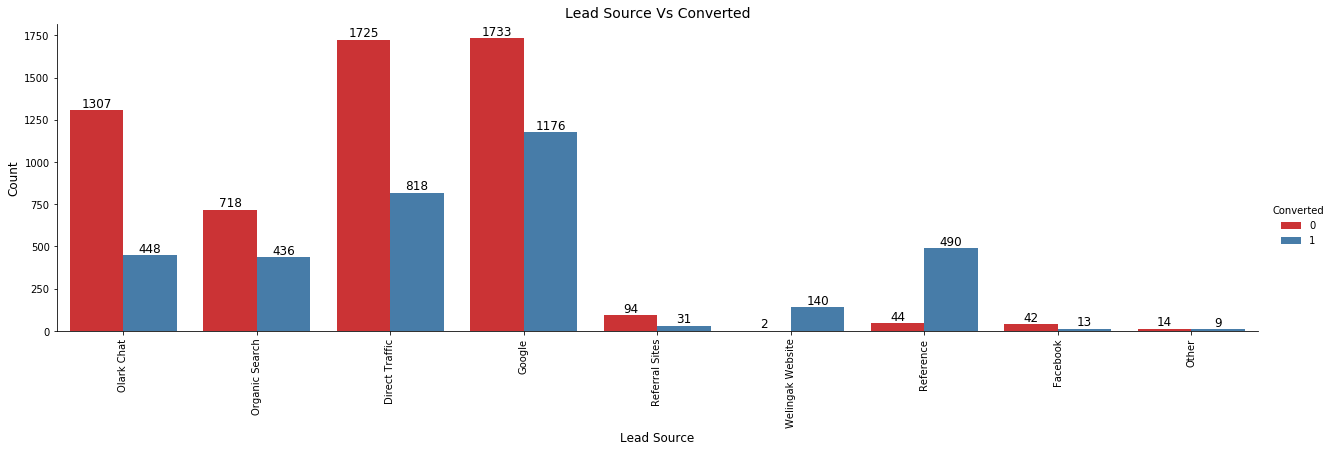

In [266]:
# plotting a cat plot for Lead Source Vs Converted

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()



# From Below graph we can notice that Via Google the maximum conversion has happened. Google really does play an important Lead source everywhere.



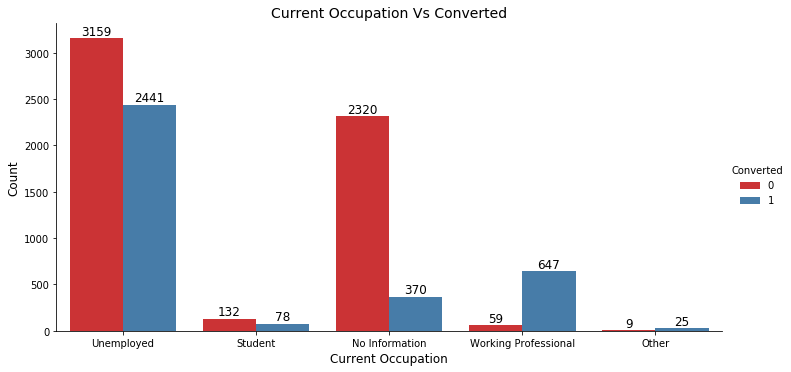

In [272]:
# What is your current occupation Vs Converted

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead_edu, palette="Set1", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()



# From the below graph we can say the rate of conversion is higher for Unemployed ones comparatively.
# Also notice that the working Professional with very good number also got converted.
# The other category including house wife , businessman have also showed up and got converted.



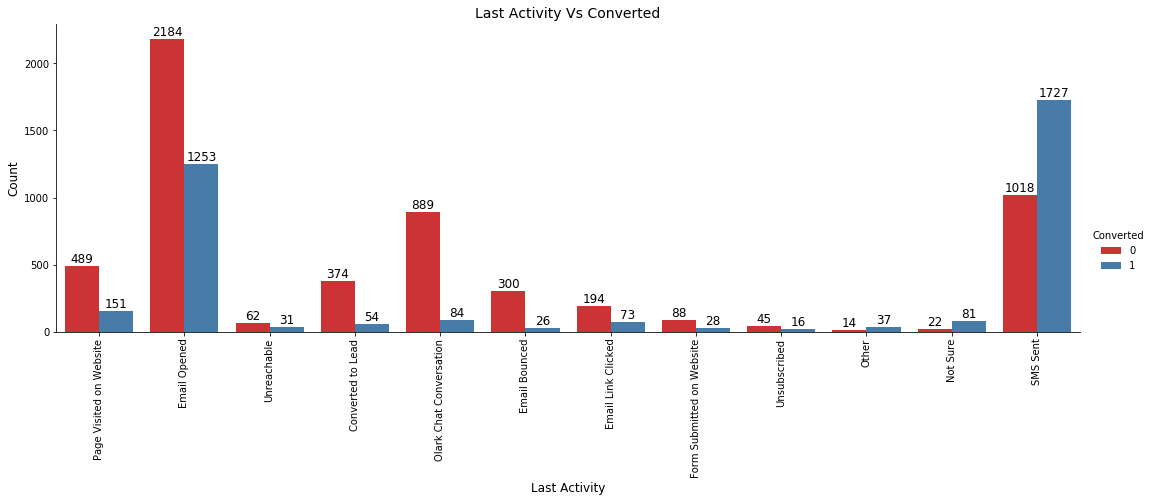

In [273]:
# Last Activity Vs Converted

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()


# From Below we can see that the conversion with Last activity as 'SMS sent' is highest
# Even people with no last activity status has showed up for conversion(Not Sure)



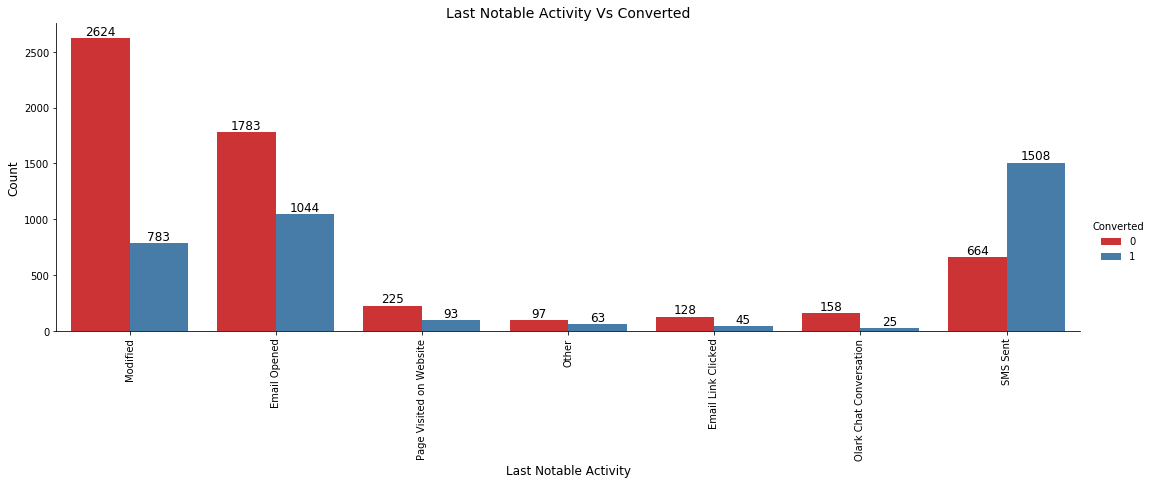

In [274]:
# Last Notable Activity Vs Converted

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()



# From Below we can see that the conversion with Last Notable activity as 'SMS sent' is highest then follows 'email Opened' ones 



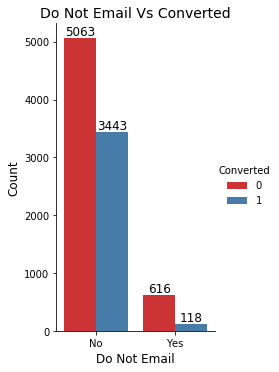

In [276]:
# plotting graph for Yes/No containing columns



# Do not Email vs converted


plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()


# Based on the below graph, major conversion happend from the emails that have been sent


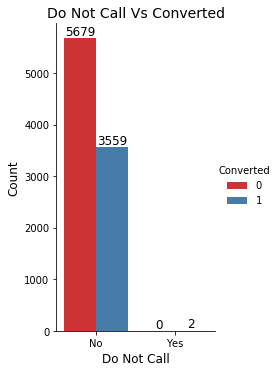

In [275]:

# Do not call vs Converted

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()


# From the below graph , it can be noticed that major conversions happened when calls were made. However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.



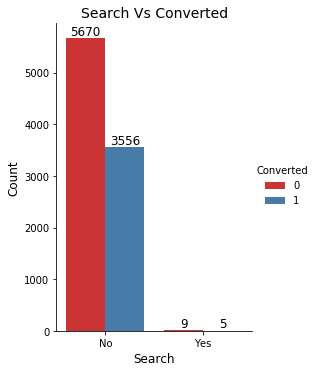

In [277]:
# Search Vs Converted

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# We can see from below that Conversion rate is high on leads who are not through search




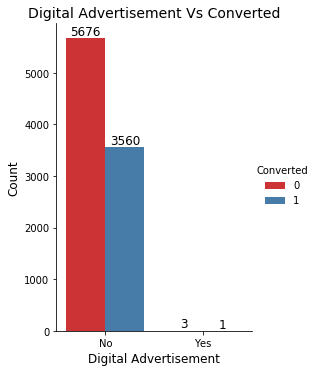

In [278]:
# Digital Advertisement Vs Converted

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# We can see from below that Conversion rate is high on leads who are not through Digital Advertisement





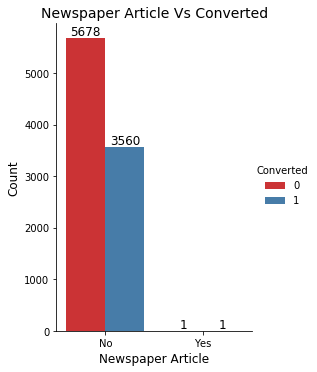

In [279]:
# Newspaper Article Vs Converted

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 0.7);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# We can see from below that Conversion rate is high on leads who are not got through Newspaper Article
# out of 2 through Newspaper Article are 1 got converted



In [307]:
# Dropping Newspaper article column as out of 2 only one has got converted , i.e, almost 50% of who is through Newspaper Article, so no need to keep this for our further analysis

lead_edu=lead_edu.drop(['Newspaper Article'],axis=1)
lead_edu.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values


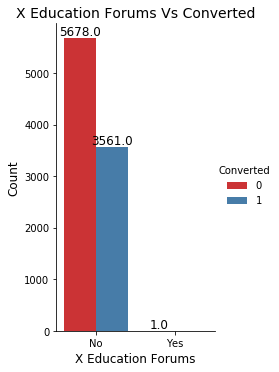

In [284]:
# X Education Forums Vs Converted
plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 0.6);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# We can see from below that Conversion rate is high on leads who are not got through X Education Forums 
# out of 1 through Newspaper x Education Forum no conversion happened, so it is good to drop this column



In [285]:
lead_edu = lead_edu.drop(['X Education Forums'], axis=1)

posx and posy should be finite values
posx and posy should be finite values


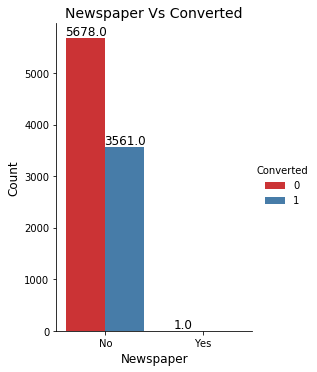

In [286]:
# Newspaper Vs Converted

plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()



# We can see from below that Conversion rate is high on leads who are not got through Newspaper.
# No conversion happened for those who got through Newspaper. So it is better to drop such column



In [287]:
lead_edu = lead_edu.drop(['Newspaper'], axis=1)

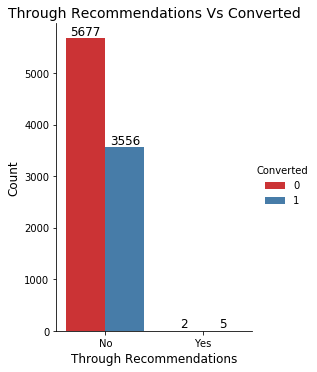

In [288]:

# Through Recommendations Vs Converted

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead_edu, palette="Set1", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()


# From below graph we can see that maximum conversion happened not Through Recommendations
# It can be seen that a total of 7 leads came Through Recommendations of which 5 leads got converted




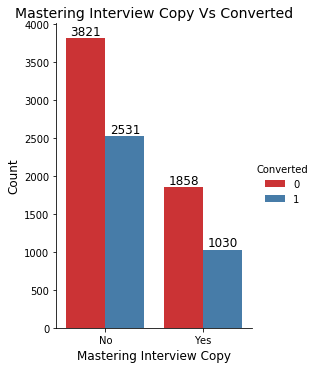

In [289]:
# A free copy of Mastering The Interview Vs Converted

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead_edu, palette="Set1",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()


# From below we can see that Conversion rate is high on leads who do not want a free copy of Mastering Interviews



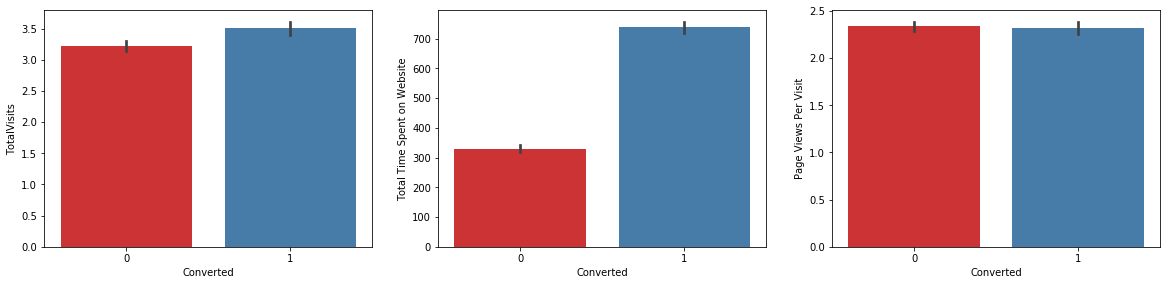

In [291]:
# Visualising for Numerical columns Total Visits, Total Time Spent on Website and Page Views Per Visit



plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = lead_edu)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = lead_edu)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = lead_edu)
plt.show()


# We can see that the conversion rates are high for Total Visits, Total Time Spent on Website and Page Views Per Visit




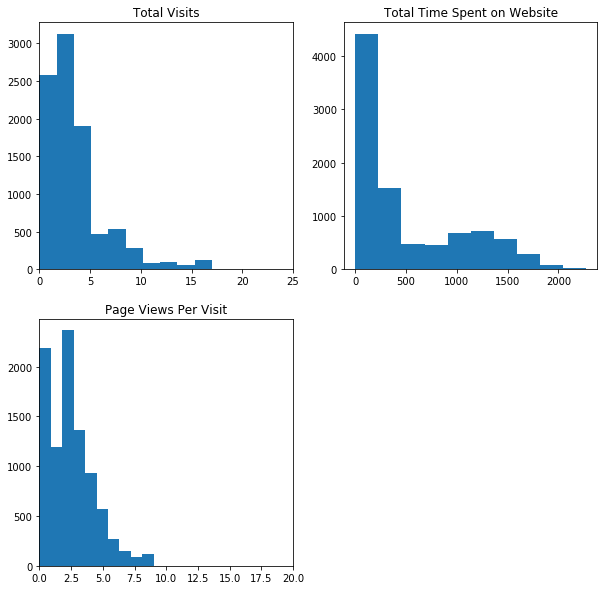

In [306]:
# checking with histplot in which range the most values fall 
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_edu['TotalVisits'])
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_edu['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_edu['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

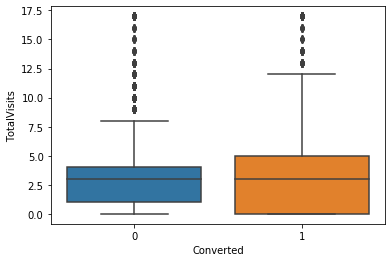

In [303]:
# checking these below numerical columns using boxplot against Converted , the outliers below were capped and now showing the difference in upeer end values

sns.boxplot(x = 'Converted', y = 'TotalVisits', data=lead_edu)


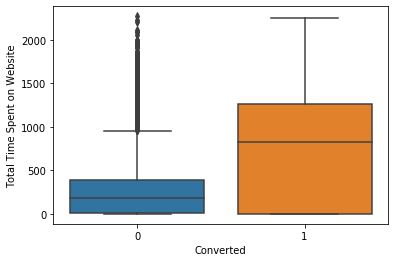

In [304]:
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data=lead_edu)

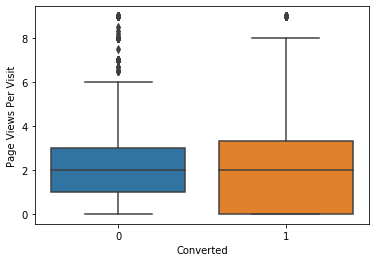

In [305]:
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data=lead_edu)

In [295]:
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Not provided,Unemployed,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Not provided,Unemployed,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Not provided,Unemployed,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Other,Management,Unemployed,No,No,No,No,No,Other
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,No,No,No,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Management,No Information,No,No,No,No,No,SMS Sent


In [296]:
lead_edu.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.038873,0.020329,0.059445
Converted,0.025157,1.000000,0.043716,0.362483,-0.004603
TotalVisits,0.038873,0.043716,1.000000,0.324556,0.706203
Total Time Spent on Website,0.020329,0.362483,0.324556,1.000000,0.336715
Page Views Per Visit,0.059445,-0.004603,0.706203,0.336715,1.000000


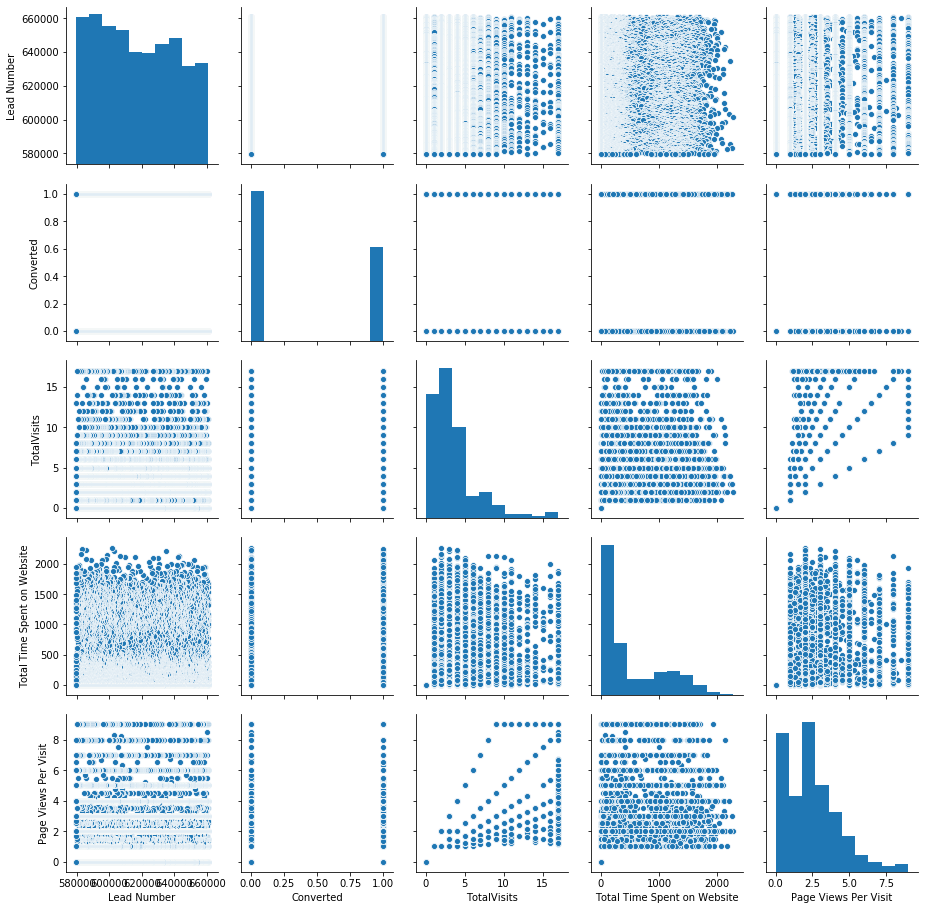

In [297]:
# checking with pairplot 
sns.pairplot(lead_edu)

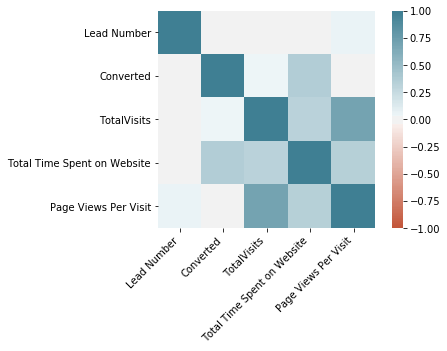

In [298]:
# checking heatmap at initial stage, later we will have more variables to check for correlation
corr_data_1 = lead_edu.corr()
ax = sns.heatmap(
    corr_data_1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# Next steps

# Data preparation
# Do scaling
# Need to convert all numerical columns to categorical --> need to make bins and assign values
# for already present categories assign with 1, 0(yes/No)
# for rest categorical columns need to dummify


### DATA PREPARATION 

In [308]:
# lets check the Dataframe overall

lead_edu.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not provided,Unemployed,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not provided,Unemployed,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not provided,No Information,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,Management,Unemployed,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not provided,No Information,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,Management,No Information,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,Management,No Information,No,No,No,No,Email Opened


In [309]:
lead_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [311]:
# First step is to convert all Yes/No categories to 1/0
# lets gather all such columns in current dataframe

variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
lead_edu[variablelist] = lead_edu[variablelist].apply(binary_map)

In [312]:
lead_edu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not provided,Unemployed,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not provided,Unemployed,0,0,0,0,Modified


#### Dummifying other categorical variables


In [315]:
# Befor proceeding to dummification of variables , we can notice that 'Last Activity' and 'Last Notable Activity' contains somewhat similar columns
# So lets keep one column and try dummifying it according to categories
# In this case we found that the categories of 'Last Activity' are more relevant and describes impact of 'Email Bounced' and 'Not sure' on conversion rate.
# so dropping 'Last Notable Activity'
 

lead_edu['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

In [316]:
lead_edu['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Not Sure                      103
Unreachable                    93
Unsubscribed                   61
Other                          51
Name: Last Activity, dtype: int64

In [317]:
# dropping Last Notable Activity column
lead_edu=lead_edu.drop(['Last Notable Activity'],axis=1)
lead_edu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   int64  
 5   Do Not Call                             9240 non-null   int64  
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [321]:
# 9240 rows and 17 columns
lead_edu.shape

(9240, 17)

In [ ]:
# Creating dummies for the following columns 

In [318]:
lead_edu['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [320]:
# dummifying for Lead Origin and creating new dataframe

lead_org=pd.get_dummies(lead_edu['Lead Origin'],drop_first=True)
lead_org.head()

,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [322]:
# concatenating lead_org dataframe with oriniginal dataframe
lead_edu=pd.concat([lead_edu,lead_org],axis=1)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Specialization,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.00,...,Not provided,Unemployed,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.50,...,Not provided,Unemployed,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,...,Business Administration,Student,0,0,0,1,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,...,Media and Advertising,Unemployed,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,...,Not provided,Unemployed,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,...,Management,Unemployed,0,0,0,0,1,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,...,Media and Advertising,Unemployed,0,0,0,1,1,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,...,Business Administration,Unemployed,0,0,0,1,1,0,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,0,0,1,3.0,499,3.00,...,Management,No Information,0,0,0,0,1,0,0,0


In [323]:
# creating dummies for Lead Source column
lead_edu['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other                 23
Name: Lead Source, dtype: int64

In [325]:
# creating dummies for Lead Source column
lead_src=pd.get_dummies(lead_edu['Lead Source'],drop_first=True)
lead_src.head(10)

,Facebook,Google,Olark Chat,Organic Search,Other,Reference,Referral Sites,Welingak Website
0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0


In [326]:
# concatenating lead_src dataframe with oriniginal dataframe
lead_edu=pd.concat([lead_edu,lead_src],axis=1)
lead_edu

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Import,Quick Add Form,Facebook,Google,Olark Chat,Organic Search,Other,Reference,Referral Sites,Welingak Website
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.00,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.50,...,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,...,0,0,0,0,0,0,0,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,...,0,0,0,0,0,0,0,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,...,0,0,0,0,0,0,0,0,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,0,0,1,3.0,499,3.00,...,0,0,0,1,0,0,0,0,0,0


In [327]:
# creating dummies for Specialization column
lead_edu['Specialization'].value_counts()

Management                           4253
Not provided                         3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Other                                 170
E-COMMERCE                            112
Name: Specialization, dtype: int64

In [328]:
lead_spec=pd.get_dummies(lead_edu['Specialization'],drop_first=True)
lead_spec.head(10)

,Business Administration,E-COMMERCE,International Business,Management,Media and Advertising,Not provided,Other,Travel and Tourism
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0,0
8,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0


In [329]:
# concatenating lead_spec dataframe with oriniginal dataframe
lead_edu=pd.concat([lead_edu,lead_spec],axis=1)
lead_edu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Referral Sites,Welingak Website,Business Administration,E-COMMERCE,International Business,Management,Media and Advertising,Not provided,Other,Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,1,0,0


In [330]:
# dummifying column 'Last Activity'

lead_edu['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Not Sure                      103
Unreachable                    93
Unsubscribed                   61
Other                          51
Name: Last Activity, dtype: int64

In [331]:
lead_last_act=pd.get_dummies(lead_edu['Last Activity'],drop_first=True)
lead_last_act.head(10)

,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Not Sure,Olark Chat Conversation,Other,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0


In [332]:
# concatenating lead_last_act dataframe with oriniginal dataframe
lead_edu=pd.concat([lead_edu,lead_last_act],axis=1)
lead_edu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Email Link Clicked,Email Opened,Form Submitted on Website,Not Sure,Olark Chat Conversation,Other,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,0


In [333]:
# dummifying current occupation colummn

lead_edu['What is your current occupation'].value_counts()

Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [334]:
lead_curr_ocu=pd.get_dummies(lead_edu['What is your current occupation'],drop_first=True)
lead_curr_ocu.head()

,Other,Student,Unemployed,Working Professional
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [335]:
# concatenating lead_curr_ocu dataframe with oriniginal dataframe
lead_edu=pd.concat([lead_edu,lead_curr_ocu],axis=1)
lead_edu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Olark Chat Conversation,Other,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Other,Student,Unemployed,Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,1,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,1,0


In [338]:
#checking final shape of the dataframe : contains 9240 rows and 52 columns
lead_edu.shape

(9240, 52)

In [337]:
lead_edu.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Add Form', 'Lead Import', 'Quick Add Form', 'Facebook', 'Google',
       'Olark Chat', 'Organic Search', 'Other', 'Reference', 'Referral Sites',
       'Welingak Website', 'Business Administration', 'E-COMMERCE',
       'International Business', 'Management', 'Media and Advertising',
       'Not provided', 'Other', 'Travel and Tourism', 'Email Bounced',
       'Email Link Clicked', 'Email Opened', 'Form Submitted on Website',
       'Not Sure', 'Olark Chat Conversation', 'Other',
       'Page Visited on Website', 'SMS Sent', 'Unreachable', 'Unsubscribed',
       '

In [339]:
# Dropping the original columns for which dummification was done and also dropping Prospect ID which is not required for model building

lead_edu=lead_edu.drop(['Lead Origin','Lead Source','Specialization','Last Activity','What is your current occupation','Prospect ID'],axis=1)
lead_edu


,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,...,Olark Chat Conversation,Other,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Other,Student,Unemployed,Working Professional
0,660737,0,0,0,0.0,0,0.00,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,660728,0,0,0,5.0,674,2.50,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,660727,0,0,1,2.0,1532,2.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,0,0,1.0,305,1.00,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,660681,0,0,1,2.0,1428,1.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,0,1,8.0,1845,2.67,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9236,579546,0,0,0,2.0,238,2.00,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9237,579545,1,0,0,2.0,199,2.00,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9238,579538,0,0,1,3.0,499,3.00,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [340]:
lead_edu.shape
#Final dataframe to be considered further contains 9240 rows and 46 columns

(9240, 46)

### Splitting Train-Test Data

In [341]:
#Importing necessary Libraries
from sklearn.model_selection import train_test_split


In [342]:

# Splitting Train-Test Data 
np.random.seed(0)
lead_edu_train,lead_edu_test=train_test_split(lead_edu,train_size=0.70,test_size=0.30,random_state=100)
print(lead_edu_train.shape)
print(lead_edu_test.shape)

(6468, 46)
(2772, 46)


### Rescaling the features using MinMaxScaler


In [344]:
# importing necessary library
from sklearn.preprocessing import MinMaxScaler

# creating scaling object
scaler=MinMaxScaler()

In [345]:
# Scaling numerical columns 
num_vars=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

lead_edu_train[num_vars]=scaler.fit_transform(lead_edu_train[num_vars])
lead_edu_train.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,...,Olark Chat Conversation,Other,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Other,Student,Unemployed,Working Professional
1871,641410,0,0,0,0.000000,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,597687,0,0,0,0.235294,0.214349,0.147778,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,626825,0,0,0,0.294118,0.046655,0.277778,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,587928,0,0,0,0.294118,0.541373,0.555556,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3934,622366,0,0,0,0.000000,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0


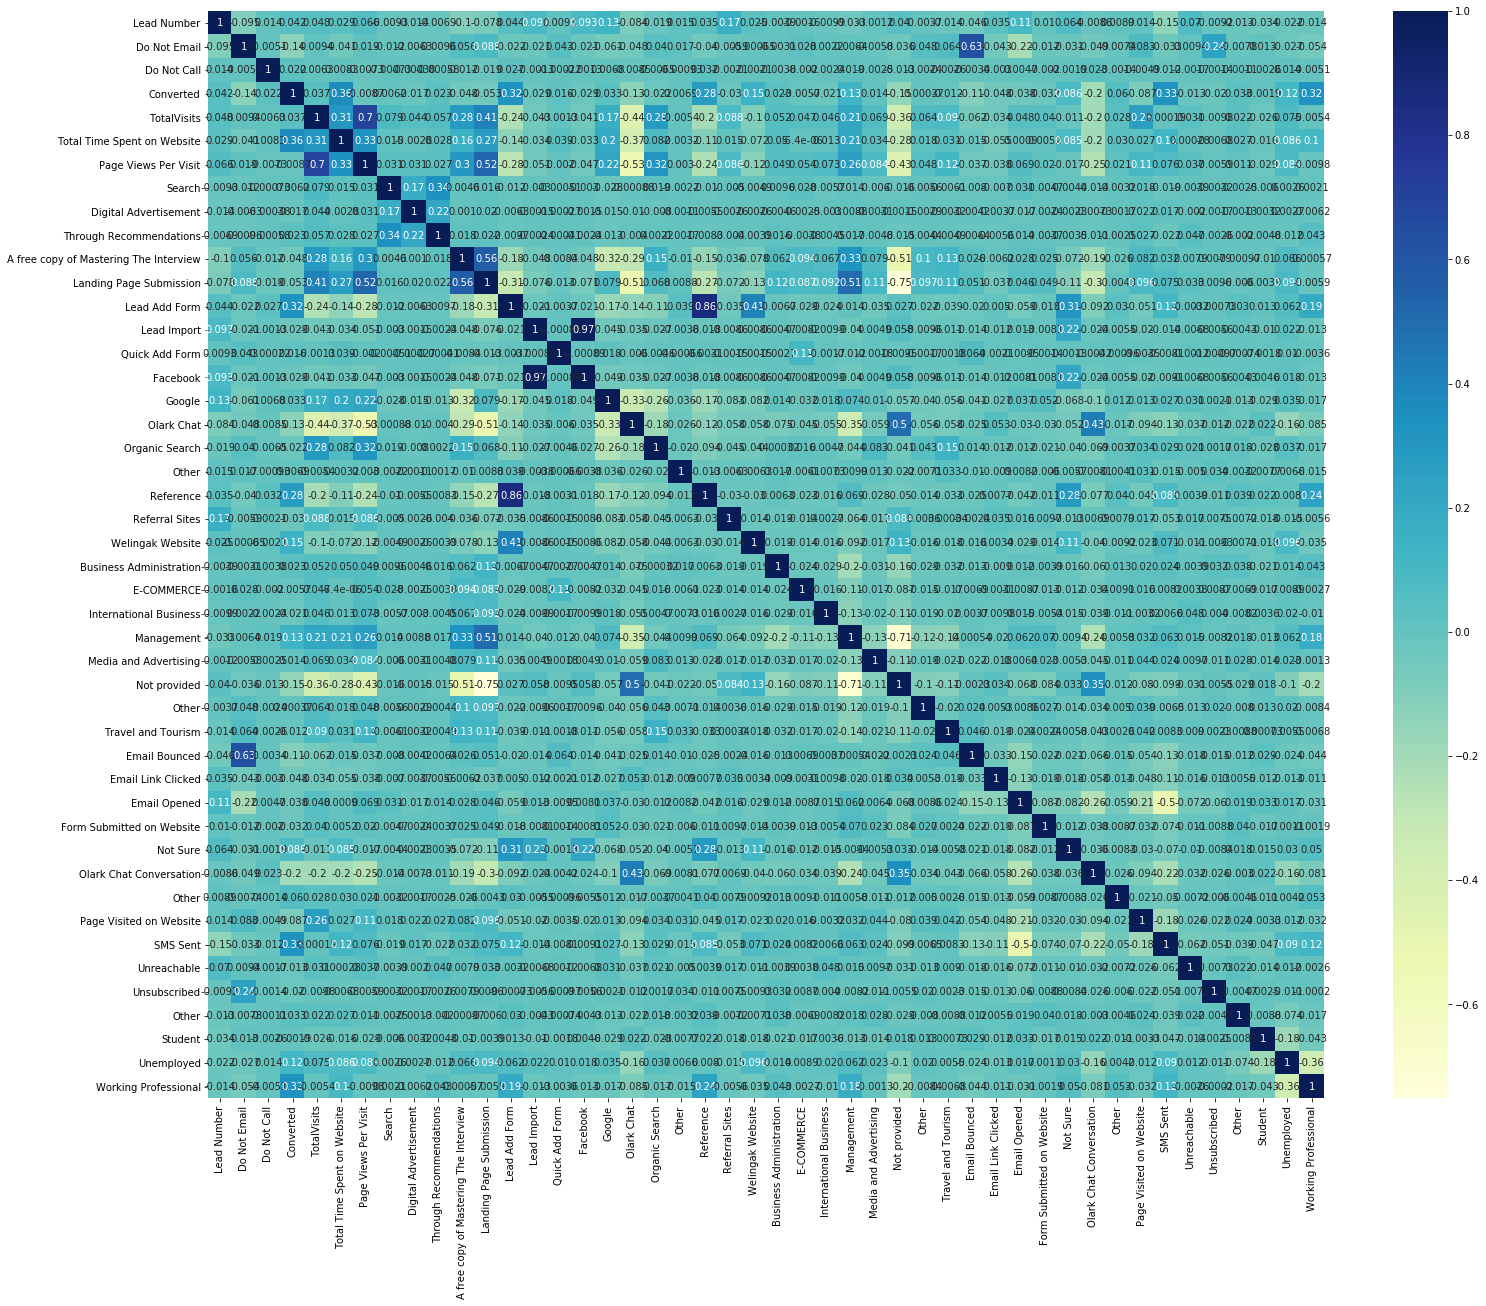

In [350]:
#Checking correlation for lead_edu_train
plt.figure(figsize=(25,20))
sns.heatmap(lead_edu_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

# From correlation matrix it is understood that Variables like Lead Import, Facebook, Lead Add Form, Reference are highly correlated and Page views per visit, TotalVisits, Email Bounced, Do not email also have good correlation value


In [352]:
### Checking the Conversion Rate Percentage : Got 38% conversion rate
lead_conv_value = (sum(lead_edu['Converted'])/len(lead_edu['Converted'].index))*100
lead_conv_value

38.53896103896104

### DIVIDING X and Y dataframe

In [355]:
lead_edu_train.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,...,Olark Chat Conversation,Other,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Other,Student,Unemployed,Working Professional
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,617186.001546,0.078386,0.000309,0.381262,0.195942,0.212974,0.257642,0.001701,0.000464,0.001082,...,0.102195,0.005875,0.072047,0.300402,0.008813,0.006030,0.003556,0.021027,0.605133,0.077613
std,23372.003514,0.268799,0.017583,0.485734,0.191627,0.240566,0.218270,0.041207,0.021533,0.032882,...,0.302929,0.076429,0.258586,0.458468,0.093468,0.077423,0.059530,0.143484,0.488860,0.267582
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596516.250000,0.000000,0.000000,0.000000,0.058824,0.005282,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615720.500000,0.000000,0.000000,0.000000,0.176471,0.108275,0.222222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,637348.750000,0.000000,0.000000,1.000000,0.294118,0.407790,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,660728.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [356]:
#train data set contains 6468 rows and 46 columns
lead_edu_train.shape

(6468, 46)

In [357]:
# test data set contains 2772 rows and 46 columns
lead_edu_test.shape

(2772, 46)

In [358]:
y_train=lead_edu_train.pop('Converted')
X_train=lead_edu_train

In [359]:
# y_train contains the converted 
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [360]:
# X_train contains the other features
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Olark Chat Conversation,Other,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Other,Student,Unemployed,Working Professional
1871,641410,0,0,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,597687,0,0,0.235294,0.214349,0.147778,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3516,626825,0,0,0.294118,0.046655,0.277778,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,587928,0,0,0.294118,0.541373,0.555556,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3934,622366,0,0,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### MODEL BUILDING

In [353]:
#import necessary libraries
import statsmodels.api as sm

#### Feature Selection using RFE
- Logistic regression model building 

In [354]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [361]:
# running RFE with 23 variables as output , as we have 46 variables with us
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 23)
rfe = rfe.fit(X_train, y_train)


In [362]:
rfe.support_

array([ True,  True, False, False,  True,  True, False, False, False,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True])

In [363]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 20),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 23),
 ('Digital Advertisement', False, 18),
 ('Through Recommendations', False, 17),
 ('A free copy of Mastering The Interview', True, 1),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 9),
 ('Quick Add Form', False, 22),
 ('Facebook', False, 7),
 ('Google', False, 19),
 ('Olark Chat', True, 1),
 ('Organic Search', True, 1),
 ('Other', False, 21),
 ('Reference', True, 1),
 ('Referral Sites', False, 3),
 ('Welingak Website', True, 1),
 ('Business Administration', False, 6),
 ('E-COMMERCE', False, 14),
 ('International Business', False, 4),
 ('Management', True, 1),
 ('Media and Advertising', False, 15),
 ('Not provided', True, 1),
 ('Other', False, 16),
 ('Travel and Tourism', False, 5),
 ('Email Bounced', True, 1),
 ('Email Link Clicke

In [364]:
col = X_train.columns[rfe.support_]

In [365]:
# columns which RFE does not support
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'Lead Import', 'Quick Add Form', 'Facebook',
       'Google', 'Other', 'Referral Sites', 'Business Administration',
       'E-COMMERCE', 'International Business', 'Media and Advertising',
       'Other', 'Travel and Tourism', 'Form Submitted on Website',
       'Unreachable', 'Unsubscribed', 'Other', 'Student'],
      dtype='object')

In [366]:
# columns which are rfe supported and these will be used to start with modelling process
col

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Olark Chat',
       'Organic Search', 'Reference', 'Welingak Website', 'Management',
       'Not provided', 'Email Bounced', 'Email Link Clicked', 'Email Opened',
       'Not Sure', 'Olark Chat Conversation', 'Other',
       'Page Visited on Website', 'SMS Sent', 'Unemployed',
       'Working Professional'],
      dtype='object')

#### BUILDING MODEL USING STATSMODEL

In [ ]:
# While model building important factors that should be checked are p-value, VIF value, 

In [367]:
#First model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.3
Date:                Mon, 07 Sep 2020   Deviance:                       5194.6
Time:                        15:46:45   Pearson chi2:                 7.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -8.2826      1.020     -8.119      0.000     -10.282      -6.283
Lead Number                             8.857e-06   1.57e-06      5.635      0.000    5.78e-06    1.19e-05
Do Not Email                              -0.9018      0.200     -4.515      0.000      -1.293      -0.510
Total Time Spent on Website                4.4372      0.166     26.738      0.000       4.112       4.762
Page Views Per Visit                      -0.5072      0.223     -2.274      0.023      -0.944      -0.070
A free copy of Mastering The Interview    -0.2666      0.090     -2.956      0.003      -0.443      -0.090
Landing Page Submission                   -0.8434      0.135     -6.268      0.000      -1.107      -0.580
Lead Add Form                              2.8231      0.535      5.272      0.000       1.774       3.873
Olark Chat                                 1.0846      0.136      7.954      0.000       0.817       1.352
Organic Search                             0.1038      0.112      0.929      0.353      -0.115       0.323
Reference                                  0.1118      0.559      0.200      0.842      -0.985       1.208
Welingak Website                           2.4890      0.893      2.788      0.005       0.739       4.239
Management                                -0.0066      0.100     -0.066      0.947      -0.203       0.190
Not provided                              -1.0501      0.148     -7.077      0.000      -1.341      -0.759
Email Bounced                             -0.2527      0.376     -0.672      0.502      -0.990       0.484
Email Link Clicked                         0.3458      0.271      1.275      0.202      -0.186       0.878
Email Opened                               0.9327      0.162      5.752      0.000       0.615       1.251
Not Sure                                  -0.6831      0.456     -1.500      0.134      -1.576       0.210
Olark Chat Conversation                   -0.4521      0.227     -1.988      0.047      -0.898      -0.006
Other                                      0.3491      0.683      0.511      0.609      -0.990       1.688
Other                                      0.2578      0.277      0.932      0.352      -0.285       0.800
Other                                      2.3406      0.499      4.692      0.000       1.363       3.318
Other                                      1.9790      0.522      3.793      0.000       0.956       3.002
Page Visited on Website                    0.4047      0.207      1.956      0.050      -0.001       0.810
SMS Sent                                   2.1125      0.165     12.800      0.000       1.789       2.436
Unemployed                                 0.9938      0.084     11.877      0.000     

In [368]:
# Here we can see that p-value is very high for Management with 0.947 value, so we will drop that variable

col = col.drop('Management',1)
col

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Olark Chat',
       'Organic Search', 'Reference', 'Welingak Website', 'Not provided',
       'Email Bounced', 'Email Link Clicked', 'Email Opened', 'Not Sure',
       'Olark Chat Conversation', 'Other', 'Page Visited on Website',
       'SMS Sent', 'Unemployed', 'Working Professional'],
      dtype='object')

In [369]:
# creating second model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.3
Date:                Mon, 07 Sep 2020   Deviance:                       5194.6
Time:                        15:57:52   Pearson chi2:                 7.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -8.2885      1.016     -8.156      0.000     -10.280      -6.297
Lead Number                             8.858e-06   1.57e-06      5.635      0.000    5.78e-06    1.19e-05
Do Not Email                              -0.9015      0.200     -4.515      0.000      -1.293      -0.510
Total Time Spent on Website                4.4368      0.166     26.749      0.000       4.112       4.762
Page Views Per Visit                      -0.5065      0.223     -2.273      0.023      -0.943      -0.070
A free copy of Mastering The Interview    -0.2665      0.090     -2.955      0.003      -0.443      -0.090
Landing Page Submission                   -0.8433      0.135     -6.268      0.000      -1.107      -0.580
Lead Add Form                              2.8228      0.535      5.272      0.000       1.773       3.872
Olark Chat                                 1.0849      0.136      7.960      0.000       0.818       1.352
Organic Search                             0.1043      0.111      0.936      0.349      -0.114       0.323
Reference                                  0.1121      0.559      0.200      0.841      -0.984       1.208
Welingak Website                           2.4894      0.893      2.789      0.005       0.740       4.239
Not provided                              -1.0451      0.127     -8.218      0.000      -1.294      -0.796
Email Bounced                             -0.2526      0.376     -0.672      0.502      -0.990       0.484
Email Link Clicked                         0.3459      0.271      1.275      0.202      -0.186       0.878
Email Opened                               0.9328      0.162      5.752      0.000       0.615       1.251
Not Sure                                  -0.6831      0.456     -1.500      0.134      -1.576       0.210
Olark Chat Conversation                   -0.4521      0.227     -1.988      0.047      -0.898      -0.006
Other                                      0.3496      0.683      0.512      0.609      -0.990       1.689
Other                                      0.2626      0.267      0.984      0.325      -0.261       0.786
Other                                      2.3411      0.499      4.693      0.000       1.363       3.319
Other                                      1.9798      0.522      3.795      0.000       0.957       3.002
Page Visited on Website                    0.4051      0.207      1.958      0.050      -0.000       0.810
SMS Sent                                   2.1126      0.165     12.802      0.000       1.789       2.436
Unemployed                                 0.9938      0.084     11.877      0.000       0.830       1.158
Working Professional                       3.4095      0.202     16.904      0.000     

In [370]:
# here we can see that p-value for Reference is very high with 0.841 , so drooping that variable from col

col= col.drop('Reference',1)
col

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Olark Chat',
       'Organic Search', 'Welingak Website', 'Not provided', 'Email Bounced',
       'Email Link Clicked', 'Email Opened', 'Not Sure',
       'Olark Chat Conversation', 'Other', 'Page Visited on Website',
       'SMS Sent', 'Unemployed', 'Working Professional'],
      dtype='object')

In [371]:
# Rebulding the model 3rd time


X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.3
Date:                Mon, 07 Sep 2020   Deviance:                       5194.6
Time:                        16:12:39   Pearson chi2:                 7.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -8.2874      1.016     -8.155      0.000     -10.279      -6.296
Lead Number                             8.859e-06   1.57e-06      5.636      0.000    5.78e-06    1.19e-05
Do Not Email                              -0.9046      0.199     -4.542      0.000      -1.295      -0.514
Total Time Spent on Website                4.4367      0.166     26.748      0.000       4.112       4.762
Page Views Per Visit                      -0.5078      0.223     -2.280      0.023      -0.944      -0.071
A free copy of Mastering The Interview    -0.2667      0.090     -2.958      0.003      -0.443      -0.090
Landing Page Submission                   -0.8444      0.134     -6.281      0.000      -1.108      -0.581
Lead Add Form                              2.9205      0.224     13.027      0.000       2.481       3.360
Olark Chat                                 1.0846      0.136      7.957      0.000       0.817       1.352
Organic Search                             0.1046      0.111      0.938      0.348      -0.114       0.323
Welingak Website                           2.3921      0.750      3.190      0.001       0.922       3.862
Not provided                              -1.0471      0.127     -8.260      0.000      -1.296      -0.799
Email Bounced                             -0.2549      0.376     -0.678      0.498      -0.992       0.482
Email Link Clicked                         0.3475      0.271      1.282      0.200      -0.184       0.879
Email Opened                               0.9339      0.162      5.762      0.000       0.616       1.252
Not Sure                                  -0.6801      0.454     -1.497      0.134      -1.571       0.210
Olark Chat Conversation                   -0.4510      0.227     -1.983      0.047      -0.897      -0.005
Other                                      0.3349      0.684      0.490      0.624      -1.006       1.675
Other                                      0.2627      0.267      0.984      0.325      -0.260       0.786
Other                                      2.3425      0.499      4.697      0.000       1.365       3.320
Other                                      1.9803      0.521      3.797      0.000       0.958       3.002
Page Visited on Website                    0.4062      0.207      1.964      0.049       0.001       0.811
SMS Sent                                   2.1134      0.165     12.810      0.000       1.790       2.437
Unemployed                                 0.9935      0.084     11.875      0.000       0.829       1.157
Working Professional                       3.4096      0.202     16.904      0.000       3.014       3.805
=======================================================================================

In [372]:
# Dropping Other which has high p-value about0.624
col=col.drop('Other',1)
col

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Olark Chat',
       'Organic Search', 'Welingak Website', 'Not provided', 'Email Bounced',
       'Email Link Clicked', 'Email Opened', 'Not Sure',
       'Olark Chat Conversation', 'Page Visited on Website', 'SMS Sent',
       'Unemployed', 'Working Professional'],
      dtype='object')

In [373]:
# Rebuilding model 4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.1
Date:                Mon, 07 Sep 2020   Deviance:                       5234.1
Time:                        16:14:42   Pearson chi2:                 6.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.8496      1.006     -7.803      0.000      -9.821      -5.878
Lead Number                             8.592e-06   1.56e-06      5.504      0.000    5.53e-06    1.17e-05
Do Not Email                              -0.9022      0.198     -4.556      0.000      -1.290      -0.514
Total Time Spent on Website                4.4468      0.165     26.913      0.000       4.123       4.771
Page Views Per Visit                      -0.4430      0.222     -1.999      0.046      -0.877      -0.009
A free copy of Mastering The Interview    -0.2791      0.090     -3.115      0.002      -0.455      -0.103
Landing Page Submission                   -0.8555      0.134     -6.393      0.000      -1.118      -0.593
Lead Add Form                              2.9921      0.223     13.425      0.000       2.555       3.429
Olark Chat                                 1.1000      0.136      8.106      0.000       0.834       1.366
Organic Search                             0.1112      0.111      1.004      0.315      -0.106       0.328
Welingak Website                           2.3503      0.750      3.135      0.002       0.881       3.820
Not provided                              -1.0714      0.126     -8.501      0.000      -1.318      -0.824
Email Bounced                             -0.5078      0.371     -1.367      0.172      -1.236       0.220
Email Link Clicked                         0.1162      0.262      0.443      0.657      -0.398       0.630
Email Opened                               0.6969      0.149      4.683      0.000       0.405       0.989
Not Sure                                  -0.9362      0.449     -2.085      0.037      -1.816      -0.056
Olark Chat Conversation                   -0.6765      0.218     -3.109      0.002      -1.103      -0.250
Page Visited on Website                    0.1892      0.196      0.963      0.336      -0.196       0.574
SMS Sent                                   1.8623      0.152     12.281      0.000       1.565       2.160
Unemployed                                 0.9564      0.082     11.617      0.000       0.795       1.118
Working Professional                       3.3879      0.201     16.856      0.000       2.994       3.782
==========================================================================================================
"""

In [374]:
# Dropping 'Email link clicked' as again this has higher p-value

col=col.drop('Email Link Clicked',1)
col

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Olark Chat',
       'Organic Search', 'Welingak Website', 'Not provided', 'Email Bounced',
       'Email Opened', 'Not Sure', 'Olark Chat Conversation',
       'Page Visited on Website', 'SMS Sent', 'Unemployed',
       'Working Professional'],
      dtype='object')

In [375]:
# Building model 5 using the above variables

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.2
Date:                Mon, 07 Sep 2020   Deviance:                       5234.3
Time:                        16:16:38   Pearson chi2:                 6.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.8213      1.004     -7.791      0.000      -9.789      -5.854
Lead Number                             8.594e-06   1.56e-06      5.506      0.000    5.53e-06    1.17e-05
Do Not Email                              -0.9066      0.198     -4.584      0.000      -1.294      -0.519
Total Time Spent on Website                4.4460      0.165     26.911      0.000       4.122       4.770
Page Views Per Visit                      -0.4368      0.221     -1.975      0.048      -0.870      -0.003
A free copy of Mastering The Interview    -0.2788      0.090     -3.113      0.002      -0.454      -0.103
Landing Page Submission                   -0.8554      0.134     -6.394      0.000      -1.118      -0.593
Lead Add Form                              2.9969      0.223     13.460      0.000       2.561       3.433
Olark Chat                                 1.1050      0.135      8.169      0.000       0.840       1.370
Organic Search                             0.1104      0.111      0.997      0.319      -0.107       0.327
Welingak Website                           2.3556      0.750      3.142      0.002       0.886       3.825
Not provided                              -1.0702      0.126     -8.493      0.000      -1.317      -0.823
Email Bounced                             -0.5358      0.366     -1.464      0.143      -1.253       0.181
Email Opened                               0.6646      0.129      5.143      0.000       0.411       0.918
Not Sure                                  -0.9713      0.442     -2.198      0.028      -1.838      -0.105
Olark Chat Conversation                   -0.7104      0.203     -3.493      0.000      -1.109      -0.312
Page Visited on Website                    0.1577      0.183      0.863      0.388      -0.201       0.516
SMS Sent                                   1.8304      0.133     13.778      0.000       1.570       2.091
Unemployed                                 0.9560      0.082     11.613      0.000       0.795       1.117
Working Professional                       3.3858      0.201     16.857      0.000       2.992       3.779
==========================================================================================================
"""

In [376]:
# Here after seeing the output p-value is high for 'Page Visited on Website' with 0.388 , so dropping that too.

col=col.drop('Page Visited on Website',1)
col

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Olark Chat',
       'Organic Search', 'Welingak Website', 'Not provided', 'Email Bounced',
       'Email Opened', 'Not Sure', 'Olark Chat Conversation', 'SMS Sent',
       'Unemployed', 'Working Professional'],
      dtype='object')

In [377]:
# Rebuilding model : 6th one , using above variables

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.5
Date:                Mon, 07 Sep 2020   Deviance:                       5235.1
Time:                        16:24:48   Pearson chi2:                 6.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.7545      1.000     -7.752      0.000      -9.715      -5.794
Lead Number                             8.578e-06   1.56e-06      5.498      0.000    5.52e-06    1.16e-05
Do Not Email                              -0.9020      0.198     -4.558      0.000      -1.290      -0.514
Total Time Spent on Website                4.4510      0.165     26.947      0.000       4.127       4.775
Page Views Per Visit                      -0.4207      0.220     -1.909      0.056      -0.853       0.011
A free copy of Mastering The Interview    -0.2770      0.090     -3.093      0.002      -0.452      -0.101
Landing Page Submission                   -0.8554      0.134     -6.397      0.000      -1.118      -0.593
Lead Add Form                              2.9986      0.223     13.476      0.000       2.563       3.435
Olark Chat                                 1.1093      0.135      8.207      0.000       0.844       1.374
Organic Search                             0.1079      0.111      0.974      0.330      -0.109       0.325
Welingak Website                           2.3560      0.750      3.143      0.002       0.887       3.825
Not provided                              -1.0688      0.126     -8.486      0.000      -1.316      -0.822
Email Bounced                             -0.6019      0.358     -1.683      0.092      -1.303       0.099
Email Opened                               0.6015      0.106      5.697      0.000       0.395       0.809
Not Sure                                  -1.0342      0.436     -2.373      0.018      -1.889      -0.180
Olark Chat Conversation                   -0.7729      0.190     -4.078      0.000      -1.144      -0.401
SMS Sent                                   1.7667      0.110     16.134      0.000       1.552       1.981
Unemployed                                 0.9546      0.082     11.598      0.000       0.793       1.116
Working Professional                       3.3808      0.201     16.842      0.000       2.987       3.774
==========================================================================================================
"""

In [378]:
# Now here Organic Search has the higher p-value with 0.33 , so dropping that too

col=col.drop('Organic Search',1)
col

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Olark Chat',
       'Welingak Website', 'Not provided', 'Email Bounced', 'Email Opened',
       'Not Sure', 'Olark Chat Conversation', 'SMS Sent', 'Unemployed',
       'Working Professional'],
      dtype='object')

In [379]:
# lets build the 7th model using above variables and get the best variables filtered

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.0
Date:                Mon, 07 Sep 2020   Deviance:                       5236.0
Time:                        16:27:15   Pearson chi2:                 6.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.7078      0.999     -7.714      0.000      -9.666      -5.749
Lead Number                             8.513e-06   1.56e-06      5.461      0.000    5.46e-06    1.16e-05
Do Not Email                              -0.9020      0.198     -4.557      0.000      -1.290      -0.514
Total Time Spent on Website                4.4476      0.165     26.931      0.000       4.124       4.771
Page Views Per Visit                      -0.3659      0.213     -1.719      0.086      -0.783       0.051
A free copy of Mastering The Interview    -0.2624      0.088     -2.972      0.003      -0.435      -0.089
Landing Page Submission                   -0.8729      0.132     -6.589      0.000      -1.133      -0.613
Lead Add Form                              2.9875      0.222     13.448      0.000       2.552       3.423
Olark Chat                                 1.0955      0.134      8.155      0.000       0.832       1.359
Welingak Website                           2.3530      0.750      3.139      0.002       0.884       3.822
Not provided                              -1.0602      0.126     -8.444      0.000      -1.306      -0.814
Email Bounced                             -0.6011      0.358     -1.680      0.093      -1.302       0.100
Email Opened                               0.5984      0.106      5.670      0.000       0.392       0.805
Not Sure                                  -1.0472      0.435     -2.406      0.016      -1.900      -0.194
Olark Chat Conversation                   -0.7750      0.189     -4.090      0.000      -1.146      -0.404
SMS Sent                                   1.7652      0.109     16.123      0.000       1.551       1.980
Unemployed                                 0.9557      0.082     11.613      0.000       0.794       1.117
Working Professional                       3.3806      0.201     16.849      0.000       2.987       3.774
==========================================================================================================
"""

In [380]:
# Dropping Email Bounced as it contains slightly more p-value around 0.093

col=col.drop('Email Bounced',1)
col

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Olark Chat',
       'Welingak Website', 'Not provided', 'Email Opened', 'Not Sure',
       'Olark Chat Conversation', 'SMS Sent', 'Unemployed',
       'Working Professional'],
      dtype='object')

In [381]:
# Lets Rebuild the model : 8th one

X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.5
Date:                Mon, 07 Sep 2020   Deviance:                       5239.0
Time:                        16:33:06   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.7262      0.999     -7.736      0.000      -9.684      -5.769
Lead Number                             8.502e-06   1.56e-06      5.456      0.000    5.45e-06    1.16e-05
Do Not Email                              -1.0711      0.175     -6.131      0.000      -1.413      -0.729
Total Time Spent on Website                4.4363      0.165     26.893      0.000       4.113       4.760
Page Views Per Visit                      -0.3538      0.213     -1.663      0.096      -0.771       0.063
A free copy of Mastering The Interview    -0.2607      0.088     -2.952      0.003      -0.434      -0.088
Landing Page Submission                   -0.8765      0.132     -6.623      0.000      -1.136      -0.617
Lead Add Form                              2.9796      0.222     13.428      0.000       2.545       3.415
Olark Chat                                 1.0932      0.134      8.137      0.000       0.830       1.356
Welingak Website                           2.3501      0.747      3.145      0.002       0.886       3.815
Not provided                              -1.0649      0.125     -8.489      0.000      -1.311      -0.819
Email Opened                               0.6282      0.105      6.010      0.000       0.423       0.833
Not Sure                                  -1.0100      0.435     -2.324      0.020      -1.862      -0.158
Olark Chat Conversation                   -0.7412      0.189     -3.927      0.000      -1.111      -0.371
SMS Sent                                   1.8040      0.108     16.759      0.000       1.593       2.015
Unemployed                                 0.9539      0.082     11.595      0.000       0.793       1.115
Working Professional                       3.3780      0.201     16.832      0.000       2.985       3.771
==========================================================================================================
"""

In [382]:
# Now from above we can see that 'Page Views Per Visit' has the 0.09 p-value, rest variables look fine, so lets drop 'Page Views Per Visit'

col=col.drop('Page Views Per Visit',1)
col


Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Add Form', 'Olark Chat', 'Welingak Website', 'Not provided',
       'Email Opened', 'Not Sure', 'Olark Chat Conversation', 'SMS Sent',
       'Unemployed', 'Working Professional'],
      dtype='object')

In [383]:
# lets Rebuild model and see if we are getting a good model, 9th model

X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.9
Date:                Mon, 07 Sep 2020   Deviance:                       5241.8
Time:                        16:36:03   Pearson chi2:                 6.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.7069      0.999     -7.718      0.000      -9.664      -5.750
Lead Number                             8.311e-06   1.55e-06      5.351      0.000    5.27e-06    1.14e-05
Do Not Email                              -1.0739      0.175     -6.145      0.000      -1.416      -0.731
Total Time Spent on Website                4.4240      0.165     26.853      0.000       4.101       4.747
A free copy of Mastering The Interview    -0.2592      0.088     -2.937      0.003      -0.432      -0.086
Landing Page Submission                   -0.8945      0.132     -6.787      0.000      -1.153      -0.636
Lead Add Form                              3.0696      0.215     14.267      0.000       2.648       3.491
Olark Chat                                 1.1810      0.124      9.535      0.000       0.938       1.424
Welingak Website                           2.3465      0.747      3.141      0.002       0.882       3.811
Not provided                              -1.0449      0.125     -8.378      0.000      -1.289      -0.800
Email Opened                               0.6151      0.104      5.902      0.000       0.411       0.819
Not Sure                                  -1.0692      0.435     -2.457      0.014      -1.922      -0.216
Olark Chat Conversation                   -0.7523      0.189     -3.989      0.000      -1.122      -0.383
SMS Sent                                   1.7853      0.107     16.682      0.000       1.576       1.995
Unemployed                                 0.9544      0.082     11.603      0.000       0.793       1.116
Working Professional                       3.3805      0.201     16.838      0.000       2.987       3.774
==========================================================================================================
"""

In [384]:
# p-value for all the variables looks good and significant , lets check VIF value 
# logm9 is the present model with X_train_sm[col] statsmodel
X_train_sm.columns

Index(['const', 'Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Add Form', 'Olark Chat', 'Welingak Website', 'Not provided',
       'Email Opened', 'Not Sure', 'Olark Chat Conversation', 'SMS Sent',
       'Unemployed', 'Working Professional'],
      dtype='object')

In [385]:
X_train[col].columns

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Add Form', 'Olark Chat', 'Welingak Website', 'Not provided',
       'Email Opened', 'Not Sure', 'Olark Chat Conversation', 'SMS Sent',
       'Unemployed', 'Working Professional'],
      dtype='object')

In [387]:
# Lets import necessary library

from statsmodels.stats.outliers_influence import variance_inflation_factor




vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,21.02
4,Landing Page Submission,7.58
8,Not provided,4.81
13,Unemployed,3.21
9,Email Opened,3.08
12,SMS Sent,2.61
2,Total Time Spent on Website,2.31
6,Olark Chat,2.30
3,A free copy of Mastering The Interview,2.19
5,Lead Add Form,2.10


In [388]:
# by checking above VIF values, Lead number really does have high VIF of 21, so lets drop it and rebuild model

col=col.drop('Lead Number',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Add Form', 'Olark Chat', 'Welingak Website', 'Not provided',
       'Email Opened', 'Not Sure', 'Olark Chat Conversation', 'SMS Sent',
       'Unemployed', 'Working Professional'],
      dtype='object')

In [389]:
# Rebuilding model : 10th model

X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.3
Date:                Mon, 07 Sep 2020   Deviance:                       5270.6
Time:                        16:46:44   Pearson chi2:                 6.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.4592      0.171    -14.400      0.000      -2.794      -2.125
Do Not Email                              -1.1358      0.174     -6.525      0.000      -1.477      -0.795
Total Time Spent on Website                4.4247      0.164     26.906      0.000       4.102       4.747
A free copy of Mastering The Interview    -0.2959      0.088     -3.371      0.001      -0.468      -0.124
Landing Page Submission                   -0.9484      0.131     -7.217      0.000      -1.206      -0.691
Lead Add Form                              3.0167      0.213     14.149      0.000       2.599       3.435
Olark Chat                                 1.0936      0.122      8.944      0.000       0.854       1.333
Welingak Website                           2.3865      0.747      3.194      0.001       0.922       3.851
Not provided                              -1.0618      0.125     -8.525      0.000      -1.306      -0.818
Email Opened                               0.5993      0.104      5.772      0.000       0.396       0.803
Not Sure                                  -1.0136      0.437     -2.318      0.020      -1.871      -0.157
Olark Chat Conversation                   -0.7622      0.188     -4.054      0.000      -1.131      -0.394
SMS Sent                                   1.6957      0.105     16.162      0.000       1.490       1.901
Unemployed                                 0.9410      0.082     11.441      0.000       0.780       1.102
Working Professional                       3.3411      0.200     16.721      0.000       2.950       3.733
==========================================================================================================
"""

In [390]:
# p-values look absolutely significant , lets check VIF 

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Landing Page Submission,4.22
12,Unemployed,2.81
7,Not provided,2.71
8,Email Opened,2.58
11,SMS Sent,2.40
2,A free copy of Mastering The Interview,2.16
1,Total Time Spent on Website,2.13
5,Olark Chat,2.09
4,Lead Add Form,1.79
10,Olark Chat Conversation,1.75


In [391]:
# Here we can see that the p-value < 0.05 and VIF value < 5 are significant and so the model with below features can be considered as good.
# But how we can just stop here ? 

X_train[col].columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Add Form', 'Olark Chat', 'Welingak Website', 'Not provided',
       'Email Opened', 'Not Sure', 'Olark Chat Conversation', 'SMS Sent',
       'Unemployed', 'Working Professional'],
      dtype='object')

####  Getting the predicted values on the train set and reshaping it

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

In [394]:
y_train_pred

array([0.54354805, 0.09307414, 0.33609586, ..., 0.29169339, 0.11887704,
       0.13845896])

In [395]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.543548,1871
1,0,0.093074,6795
2,0,0.336096,3516
3,0,0.835413,8105
4,0,0.291693,3934


In [396]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.543548,1871,1
1,0,0.093074,6795,0
2,0,0.336096,3516,0
3,0,0.835413,8105,1
4,0,0.291693,3934,0


#### Confusion Matrix


In [397]:
# Lets check the confusion matrix and accuracy
# importing necessary libraries
from sklearn import metrics

In [398]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3543  459]
 [ 716 1750]]


In [399]:
#The values in matrix described like below

# Predicted  --->  Not_converted   Converted
# Actual(down)
# Not_converted        3543         449
# Converted            716          1750

In [400]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8183364254792826


-  Accuracy rate is around 81% which is a good score for a model. 
-  But we also need to calculate the other metrics as we cannot decide on the accuracy alone

In [401]:
#Checking for other Metrices like Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

# So first assign the necessary values for our calculation

TP = confusion[1,1] # True Positives 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives


In [402]:
# Let's check sensitivity of our logistic regression model : formulating below

TP / float(TP+FN)

0.7096512570965126

In [403]:
# Let's check specificity of the model : formulating below

TN / float(TN+FP)

0.8853073463268366

In [404]:
# Calculating False Postive Rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11469265367316342


In [405]:
# positive predictive value (PPR)

print (TP / float(TP+FP))

0.7922136713444998


In [406]:
# calculating Negative predictive value(NPR)

print (TN / float(TN+ FN))

0.8318854191124677


### ROC Curve Plot

In [407]:
# Lets analyse by drawing ROC curve which better explains the tradeoff between sensitivity and specificity
# Let's write a function to proceed further

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [408]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,drop_intermediate = False )

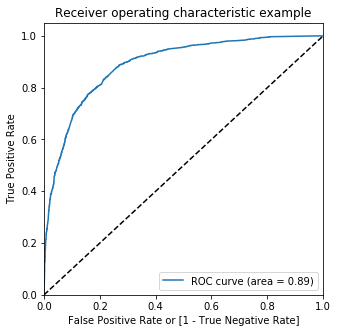

In [409]:
# Draw ROC 
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [410]:
# Optimal Cutoff Probability is the probability where we get balanced sensitivity and specificity
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.543548,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.093074,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.336096,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.835413,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.291693,3934,0,1,1,1,0,0,0,0,0,0,0


In [411]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.623686  0.969992  0.410295
0.2   0.2  0.762987  0.917680  0.667666
0.3   0.3  0.800866  0.841849  0.775612
0.4   0.4  0.815863  0.766829  0.846077
0.5   0.5  0.818336  0.709651  0.885307
0.6   0.6  0.803340  0.611111  0.921789
0.7   0.7  0.784632  0.525142  0.944528
0.8   0.8  0.759122  0.421330  0.967266
0.9   0.9  0.709338  0.253447  0.990255


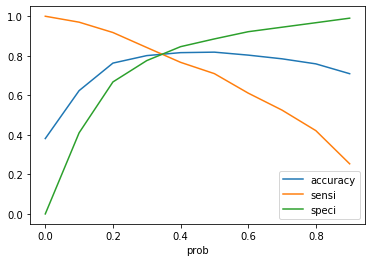

In [412]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


- By observing the curve, I think optimal cutoff point should be considered as 0.35, so this is the cutoff probability


In [413]:
# Lets make final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.543548,1871,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.093074,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.336096,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.835413,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.291693,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [414]:
# Lets calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.543548,1871,1,1,1,1,1,1,1,0,0,0,0,1,54
1,0,0.093074,6795,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.336096,3516,0,1,1,1,1,0,0,0,0,0,0,0,34
3,0,0.835413,8105,1,1,1,1,1,1,1,1,1,1,0,1,84
4,0,0.291693,3934,0,1,1,1,0,0,0,0,0,0,0,0,29
5,1,0.989588,4844,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.119440,3297,0,1,1,0,0,0,0,0,0,0,0,0,12
7,1,0.989674,8071,1,1,1,1,1,1,1,1,1,1,1,1,99
8,0,0.126327,987,0,1,1,0,0,0,0,0,0,0,0,0,13
9,1,0.896558,7423,1,1,1,1,1,1,1,1,1,1,0,1,90


In [415]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1974
0     492
Name: final_predicted, dtype: int64

In [416]:
# checking the precentage of final_predicted conversions

1974/float(1974+492)

0.8004866180048662

Hence we can see that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement. So this has to be considered as a good model

In [417]:
# Let's check the overall accuracy, sensitivity, specificity and other metrics too.
# Overall Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
#80% good accuracy

0.8076685219542362

In [418]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3250,  752],
       [ 492, 1974]])

In [419]:
# again assignment of values needs to be done
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [420]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8004866180048662

In [421]:
# Lets calculate specificity

TN / float(TN+FP)

0.8120939530234883

In [422]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.18790604697651175


In [424]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7241379310344828


In [425]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8685195082843399


### Precision and Recall


In [426]:
#Lets check confusion matrix once

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3543,  459],
       [ 716, 1750]])

In [427]:
# lets check these metrics also, need to import necessary libraries

from sklearn.metrics import precision_score, recall_score


In [428]:
# precision calculation

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7922136713444998

In [429]:
# Recall calculation

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7096512570965126

### Precision and recall tradeoff

In [430]:
#lets import pre_rec_curve 
from sklearn.metrics import precision_recall_curve


In [431]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [432]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


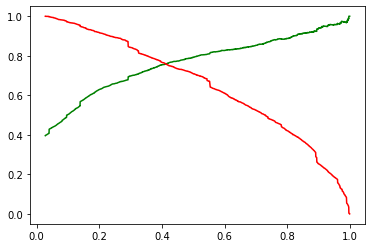

In [433]:
# plot curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [435]:
# Lets take numerical columns for making predictions on test data
# below were already stored in num_vars before, but clearly mentioning the columns again for test dataset here
lead_edu_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(lead_edu_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])



In [436]:
lead_edu_test.head()



,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,...,Olark Chat Conversation,Other,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Other,Student,Unemployed,Working Professional
4269,619003,0,0,1,0.470588,0.444982,0.888889,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2376,636884,0,0,1,0.000000,0.000000,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7766,590281,0,0,1,0.294118,0.025968,0.555556,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9199,579892,0,0,0,0.000000,0.000000,0.000000,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4359,617929,0,0,1,0.000000,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [437]:
lead_edu_test.shape

(2772, 46)

In [438]:

# considering only required cols
X_test = lead_edu_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Olark Chat,Welingak Website,Not provided,Email Opened,Not Sure,Olark Chat Conversation,SMS Sent,Unemployed,Working Professional
4269,0,0.444982,0,0,0,0,0,1,0,0,0,1,0,0
2376,0,0.000000,0,0,1,0,0,1,0,0,0,1,1,0
7766,0,0.025968,0,0,0,0,0,0,0,0,0,0,0,1
9199,0,0.000000,0,0,0,1,0,1,0,0,1,0,1,0
4359,0,0.000000,0,0,1,0,0,0,1,0,0,0,1,0


In [439]:
# adding constant using statsmodel
X_test_sm = sm.add_constant(X_test)

In [440]:
# making predictions on test set 
y_test_pred = res.predict(X_test_sm)

In [441]:
y_test_pred[:10]

4269    0.535830
2376    0.894009
7766    0.730435
9199    0.095466
4359    0.890683
9186    0.603710
1631    0.526340
8963    0.188642
8007    0.060788
5324    0.387149
dtype: float64

In [442]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [443]:
y_pred_1.head()

,0
4269,0.535830
2376,0.894009
7766,0.730435
9199,0.095466
4359,0.890683


In [446]:

y_test=lead_edu_test.pop('Converted')

y_test

4269    1
2376    1
7766    1
9199    0
4359    1
       ..
8649    0
2152    1
7101    0
5331    0
2960    1
Name: Converted, Length: 2772, dtype: int64

In [447]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [448]:
y_test_df

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1
...,...
8649,0
2152,1
7101,0
5331,0


In [449]:
# Putting LeadId to index

y_test_df['Prospect Id'] = y_test_df.index

In [450]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [451]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [452]:
y_pred_final.head()

,Converted,Prospect Id,0
0,1,4269,0.535830
1,1,2376,0.894009
2,1,7766,0.730435
3,0,9199,0.095466
4,1,4359,0.890683


In [453]:

# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [459]:
# Rearranging the columns to give a proper readability

y_pred_final = y_pred_final.reindex(['Prospect Id','Converted','Converted_Prob'], axis=1)

In [460]:
# y_test_df = pd.DataFrame(y_test)

y_pred_final.head()


,Prospect Id,Converted,Converted_Prob
0,4269,1,0.535830
1,2376,1,0.894009
2,7766,1,0.730435
3,9199,0,0.095466
4,4359,1,0.890683


In [461]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.35%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [462]:
y_pred_final.head()

,Prospect Id,Converted,Converted_Prob,final_predicted
0,4269,1,0.535830,1
1,2376,1,0.894009,1
2,7766,1,0.730435,1
3,9199,0,0.095466,0
4,4359,1,0.890683,1


In [463]:
# Now let's calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Prospect Id,Converted,Converted_Prob,final_predicted,lead_score
0,4269,1,0.535830,1,54
1,2376,1,0.894009,1,89
2,7766,1,0.730435,1,73
3,9199,0,0.095466,0,10
4,4359,1,0.890683,1,89
5,9186,1,0.603710,1,60
6,1631,1,0.526340,1,53
7,8963,1,0.188642,0,19
8,8007,0,0.060788,0,6
9,5324,1,0.387149,1,39


In [464]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    865
0    230
Name: final_predicted, dtype: int64

In [465]:
# check the precentage of final_predicted conversions on test data

865/float(865+230)

0.7899543378995434


 Hence we can see that the final prediction of conversions have a target rate of 79%


#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [466]:
#checking overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8048340548340548

In [467]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1366,  311],
       [ 230,  865]])

In [468]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [469]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7899543378995434

In [470]:
# Let us calculate specificity
TN / float(TN+FP)

0.8145497912939773

#### Precision and recall on Test set

In [471]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7355442176870748


In [472]:
# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

recall  0.7899543378995434


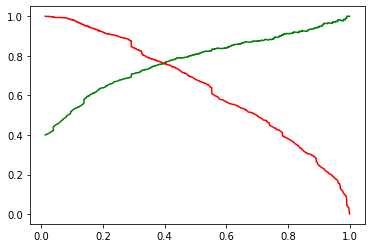

In [473]:
# draw curve
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### CONCLUSION

- We built a model with the significant features by calculating different confusion metrics.
- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal cut off value based on Sensitivity and Specificity for calculating the final prediction of model.
- Accuracy, Sensitivity and Specificity values of test set are around 80%, 79% and 81% respectively are approximately   equal to the respective values calculated using trained set as 80%, 80% and 81%.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%, as per the X-Education CEO's requirement
- Also checked p-value and VIF, both were significant for the final featured Model, Hence overall the model looks    good.